#Installing Dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pydicom
!pip install albumentations==0.4.6
!pip install nilearn
!pip install nipype
!pip install gdown

     |████████████████████████████████| 1.9 MB 7.9 MB/s 
     |████████████████████████████████| 117 kB 8.1 MB/s 
     |████████████████████████████████| 948 kB 29.3 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65173 sha256=6a2df4343785c16ea27462ead3fc8ac46031403a7db85a8cd2a2e4835646a32e
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
     |████████████████████████████████| 4.9 MB 7.8 MB/s 
     |████████████████████████████████| 3.2 MB 8.2 MB/s 
     |████████████████████████████████| 421 kB 60.7 MB/s 
     |████

##Basic Imports

In [2]:
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import os 
from os import environ
import time
import cv2
#from google.colab.patches import cv2_imshow
import torch
import zipfile
from PIL import Image
import glob
import shutil
import gdown
import random
from imutils import paths
from tqdm.notebook import tqdm
from matplotlib import colors
import seaborn as sns 
#%matplotlib notebook
#%matplotlib inline
from collections import defaultdict
import copy
import pydicom 
from pydicom.data import get_testdata_files
import nibabel as nib
from scipy import ndimage

ModuleNotFoundError: ignored

##SKLearn & SKImage

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from skimage.io import imread 
from skimage.transform import resize 
from skimage.morphology import binary_closing, binary_erosion, binary_dilation, binary_opening 
from skimage.filters import gaussian
from skimage.data import camera 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from skimage.io import imread
from skimage.transform import resize,rescale
from skimage.morphology import binary_closing, binary_erosion, binary_dilation,binary_opening
from skimage.filters import gaussian
from skimage.color import rgb2gray

##Keras & TensorFlow

In [1]:
from keras.preprocessing.image import img_to_array
from keras import backend as K
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Dropout
from keras.layers.core import Dense
from keras.layers.core import Flatten
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.models import load_model 

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

##Pytorch

In [6]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.models as models
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image
import albumentations

##NiLearn & NiPype

In [41]:
import nibabel as nib
import nilearn

from nilearn import plotting
from nilearn import datasets

from nipype.interfaces.ants import N4BiasFieldCorrection
from nilearn import plotting 
import nipype.interfaces.fsl as fsl

#Handy notebook links:

2d - data prep - https://colab.research.google.com/drive/1r9DdO13IwsSkacvymXcFH3AWeONSIG5w#scrollTo=W7HipbJ8h5_I

2d - custom cnn - https://colab.research.google.com/drive/1vSoN4UHBD0hys6mmHkgPe6xxmi7bVt2q

2d - unet - https://colab.research.google.com/drive/1P-FUcFjD-xiP_omM4VDs_mdVeUNHOMac#scrollTo=PcHT--E01eq4

3d - custom cnn/ outcome of ct - https://colab.research.google.com/drive/1fUwAJJdRdJa1nsmw6jNKQM2jxo5AEQzL

3d mri basics - https://colab.research.google.com/drive/1fre6rkhFmR83rxpg8VhsENnJ65AiljOT

#**DIME**

Steps for Loading Data 

1. Targeting the Respective Folder (Train or Test)
2. Passing it to "OS" to get its directory
3. Iterating it through every DICOM Image .
4. Passing it to Preprocessing
5. Saving Processed each & every image in their respective variable of Train & Test 

Preprocessing Done:
1. Checking if image is Read or Not.
2. Once the Image is Read then dividing it by 4096 to make it standardise.
3. Reshaping the Image to (512*512).

##Importing Dataset (run only once)

In [ ]:
os.chdir('/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset') 
!unzip -d '/content/' TRAIN.zip 
!unzip -d '/content/' TEST.zip 

Archive:  TRAIN.zip
   creating: /content/TRAIN/NON-PCR/
  inflating: /content/TRAIN/NON-PCR/1-01 (1).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (10).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (11).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (12).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (13).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (14).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (15).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (16).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (17).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (18).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (19).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (2).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (20).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (3).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (4).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (5).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (6).dcm  
  inflating: /content/TRAIN/NON-PCR/1-01 (7).dcm  
  inflating: /

In [ ]:
os.mkdir('/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training')
os.mkdir('/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/testing')

In [ ]:
shutil.copytree('/content/TRAIN/PCR','/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/PCR')
shutil.copytree('/content/TRAIN/NON-PCR','/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/NON-PCR')

shutil.copytree('/content/TEST/pcr','/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/testing/PCR')
shutil.copytree('/content/TEST/non-pcr','/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/testing/NON-PCR')

'/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/testing/NON-PCR'

##EDA & Preprocessing

###TRAIN-PCR-DataSet 

In [ ]:
folder='/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/PCR'
train_pcr_images = []
y_train_pcr=[]
for filename in os.listdir(folder):
  img = np.array(pydicom.dcmread(os.path.join(folder,filename)).pixel_array)
  if img is not None: 
    img=img/4096 
    img = np.reshape(img,(512*512))
    train_pcr_images.append(img) 
    y_train_pcr.append(0) 

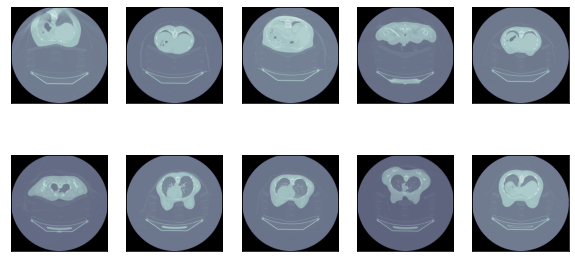

In [ ]:
#To show some images in a group
fig = plt.figure(figsize=(10, 5))
# plot several images
for i in range(10):#Showing 15 images 
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(train_pcr_images[i].reshape(512, 512), cmap=plt.cm.bone)

###TRAIN-NON PCR-DataSet

In [ ]:
folder='/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/NON-PCR'
train_nonpcr_images = []
y_train_nonpcr=[]
for filename in os.listdir(folder):
  img = np.array(pydicom.dcmread(os.path.join(folder,filename)).pixel_array)
  if img is not None:
    img=img/4096
    img=np.reshape(img,(512*512))
    train_nonpcr_images.append(img)
    y_train_nonpcr.append(1)

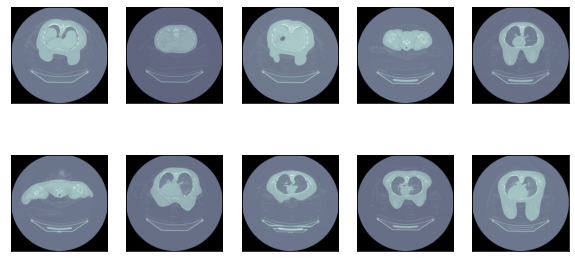

In [ ]:
#To show some images in a group
fig = plt.figure(figsize=(10, 5))
# plot several images
for i in range(10):#Showing 15 images
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(train_nonpcr_images[i].reshape(512, 512), cmap=plt.cm.bone)

In [ ]:
a=np.array(train_pcr_images)
print(a.shape)

b=np.array(train_nonpcr_images)
print(b.shape)

X_train=np.vstack((a, b))
print(X_train.shape)

(1743, 262144)


In [ ]:
del a
del b
del img



---



---



###TEST-PCR-DataSet

In [ ]:
folder='/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/testing/PCR'

test_pcr_images = []
y_test_pcr=[]
for filename in os.listdir(folder):
  img = np.array(pydicom.dcmread(os.path.join(folder,filename)).pixel_array)
  if img is not None:
    img=img/4096
    img=np.reshape(img,(512*512))
    test_pcr_images.append(img)
    y_test_pcr.append(0)

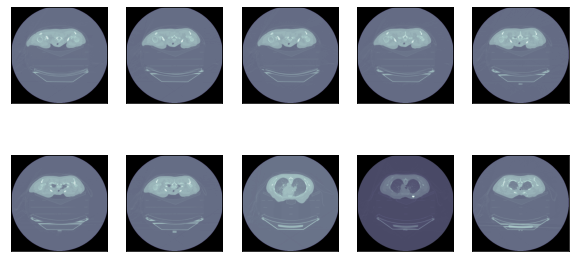

In [ ]:
#To show some images in a group
fig = plt.figure(figsize=(10, 5))
# plot several images
for i in range(10):#Showing 10 images
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(test_pcr_images[i].reshape(512, 512), cmap=plt.cm.bone)

###TEST-NON PCR-DataSet

In [ ]:
folder='/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/testing/NON-PCR'

test_nonpcr_images = []
y_test_nonpcr=[]
for filename in os.listdir(folder):
  img = np.array(pydicom.dcmread(os.path.join(folder,filename)).pixel_array)
  if img is not None:
    img=img/4096
    img=np.reshape(img,(512*512))
    test_nonpcr_images.append(img)
    y_test_nonpcr.append(1)

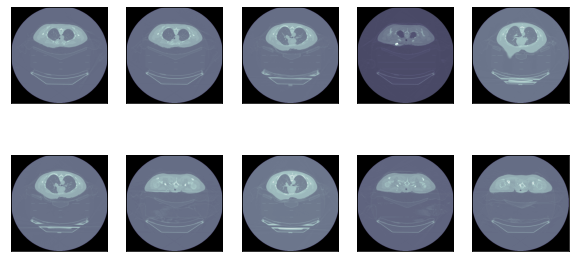

In [ ]:
#To show some images in a group
fig = plt.figure(figsize=(10, 5))
# plot several images
for i in range(10):#Showing 10 images
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(test_nonpcr_images[i].reshape(512, 512), cmap=plt.cm.bone)

In [ ]:
a=np.array(test_pcr_images)
print(a.shape)

b=np.array(test_nonpcr_images)
print(b.shape)

X_test=np.vstack((a, b))
print(X_test.shape)

In [ ]:
print("Total no of Train PCR images are : ",len(train_pcr_images))
print("Total no of Train NON-PCR images are : ",len(train_nonpcr_images))
print("Total no of Test PCR images are : ",len(test_pcr_images))
print("Total no of Test NON-PCR images are : ",len(test_nonpcr_images))

In [ ]:
del a 
del b
del img

In [ ]:
del train_pcr_images
del train_nonpcr_images
del test_pcr_images
del test_nonpcr_images

# Start from here

In [42]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
from skimage import measure
from itertools import islice
import pydicom as dicom
import scipy

In [43]:
train_path_pcr = '/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/PCR/1-'
train_dcm_pcr = []
train_dcm_pcr_main = []
train_y_pcr = []
train_y_nonpcr = []
train_path_nonpcr = '/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/NON-PCR/1-'
train_dcm_nonpcr = []
train_dcm_nonpcr_main = []
for i in range(1,84):
    if i<10:
        for j in range(0,21):
            if j==0:
                train_dcm_pcr.append(train_path_pcr+'0'+str(i)+'.dcm')
            else:
                                     
                            train_dcm_pcr.append(train_path_pcr+'0'+str(i)+' '+'('+str(j)+')'+'.dcm')
    else:   
        for j in range(0,21):
            if j==0:
                train_dcm_pcr.append(train_path_pcr+str(i)+'.dcm')
            else:
                            train_dcm_pcr.append(train_path_pcr+str(i)+' '+'('+str(j)+')'+'.dcm')

In [44]:
length_to_split = [21]*83
train_dcm_pcr_main = [list(islice(train_dcm_pcr, elem))
          for elem in length_to_split]

In [ ]:
def getpaths(path, y):
    train_path_pcr = path
    train_dcm_pcr = []
    train_dcm_pcr_main = []
    for i in range(1,84):
        if i<10:
            for j in range(0,21):
                if j==0:
                    train_dcm_pcr.append(train_path_pcr+'0'+str(i)+'.dcm')
                else:
                                        
                                train_dcm_pcr.append(train_path_pcr+'0'+str(i)+' '+'('+str(j)+')'+'.dcm')
        else:   
            for j in range(0,21):
                if j==0:
                    train_dcm_pcr.append(train_path_pcr+str(i)+'.dcm')
                else:
                                train_dcm_pcr.append(train_path_pcr+str(i)+' '+'('+str(j)+')'+'.dcm')

    length_to_split = [21]*83
    train_dcm_pcr_main = [list(islice(train_dcm_pcr, elem))
              for elem in length_to_split]
        train_y_pcr.append(y)

    return train_dcm_pcr_main

In [12]:
train_dcm_pcr_main[0]

['/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/PCR/1-01.dcm',
 '/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/PCR/1-01 (1).dcm',
 '/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/PCR/1-01 (2).dcm',
 '/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/PCR/1-01 (3).dcm',
 '/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/PCR/1-01 (4).dcm',
 '/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/PCR/1-01 (5).dcm',
 '/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/PCR/1-01 (6).dcm',
 '/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/PCR/1-01 (7).dcm',
 '/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/PCR/1-01 (8).dcm',
 '/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/PCR/1-01 (9).dcm',
 '/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/training/PCR/1-01 (10).dcm',
 '

In [ ]:
#pcr
xpath_tr1,y_train1 = getpaths(train_path_pcr, 1)
#non pcr
xpath_tr2,y_train2 = getpaths(train_path_nonpcr, 0)

xpath_tr = xpath_tr1 + xpath_tr2
y_train = y_train1 + y_train2

In [15]:
def load_scan():
    slices = [dicom.read_file(s) for s in train_dcm_pcr_main[0]]
    slices.sort(key = lambda x: int(x.InstanceNumber))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

def get_pixels_hu(scans):
    image = np.stack([s.pixel_array for s in scans])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 1
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    intercept = scans[0].RescaleIntercept
    slope = scans[0].RescaleSlope
    
    if slope != 1:
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)
        
    image += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

id=0
patient = load_scan()
imgs = get_pixels_hu(patient)

In [45]:
output_path = '/content/drive/MyDrive/MedHacks_Drive/Hackathon/DIME_Dataset/TeamOmnimanTrials/'

In [46]:
np.save(output_path + "fullimages_%d.npy" % (id), imgs)

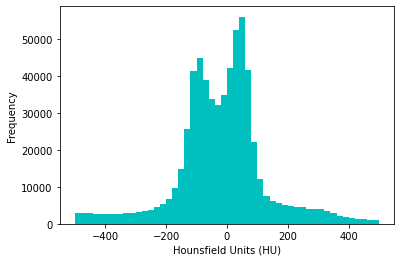

In [47]:
def viewhist(output_path)
  file_used=output_path+"fullimages_%d.npy" % id
  imgs_to_process = np.load(file_used).astype(np.float64) 

  plt.hist(imgs_to_process.flatten(), bins=50, color='c', range=[-500,500])
  plt.xlabel("Hounsfield Units (HU)")
  plt.ylabel("Frequency")
  plt.show()

In [48]:
print("Slice Thickness: %f" % patient[0].SliceThickness)
print("Pixel Spacing (row, col): (%f, %f) " % (patient[0].PixelSpacing[0], patient[0].PixelSpacing[1]))

Slice Thickness: 29.500000
Pixel Spacing (row, col): (1.367188, 1.367188) 


In [49]:
id = 0
imgs_to_process = np.load(output_path+'fullimages_{}.npy'.format(id))
def resample(image, scan, new_spacing=[1,1,1]):
    # Determine current pixel spacing
    spacing = map(float, ([scan[0].SliceThickness] + list(scan[0].PixelSpacing)))
    spacing = np.array(list(spacing))
    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor
    
    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor)
    
    return image, new_spacing

print("Shape before resampling\t", imgs_to_process.shape)
imgs_after_resamp, spacing = resample(imgs_to_process, patient, [1,1,1])
print("Shape after resampling\t", imgs_after_resamp.shape)

Shape before resampling	 (21, 512, 512)
Shape after resampling	 (620, 700, 700)


In [30]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.tools import FigureFactory as FF
from plotly.graph_objs import *

In [35]:
def make_mesh(image, threshold=-300, step_size=1):

    print("Transposing surface")
    p = image.transpose(2,1,0)
    
    print("Calculating surface")
    #verts, faces, norm, val = measure.marching_cubes(p, threshold, step_size=step_size, allow_degenerate=True) 
    verts, faces, norm, val = measure.marching_cubes_lewiner(p, threshold, step_size=step_size, allow_degenerate=True)
    return verts, faces

def plotly_3d(verts, faces):
    x,y,z = zip(*verts) 
    
    print("Drawing")
    
    # Make the colormap single color since the axes are positional not intensity. 
#    colormap=['rgb(255,105,180)','rgb(255,255,51)','rgb(0,191,255)']
    colormap=['rgb(236, 236, 212)','rgb(236, 236, 212)']
    
    fig = FF.create_trisurf(x=x,
                        y=y, 
                        z=z, 
                        plot_edges=False,
                        colormap=colormap,
                        simplices=faces,
                        backgroundcolor='rgb(64, 64, 64)',
                        title="Interactive Visualization")
    #iplot(fig)
    fig.show()
    

def plt_3d(verts, faces):
    print("Drawing")
    x,y,z = zip(*verts) 
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], linewidths=0.05, alpha=1)
    face_color = [1, 1, 0.9]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, max(x))
    ax.set_ylim(0, max(y))
    ax.set_zlim(0, max(z))
    ax.set_facecolor((0.7, 0.7, 0.7))
    plt.show()

In [28]:
v, f = make_mesh(imgs_after_resamp, -400)

Transposing surface
Calculating surface


In [53]:
v

array([[  0.    , 698.6094,   1.    ],
       [  0.    , 698.6094,   0.    ],
       [  1.    , 698.6094,   1.    ],
       ...,
       [698.6094, 698.    , 617.    ],
       [698.6094, 698.    , 618.    ],
       [698.6094, 698.    , 619.    ]], dtype=float32)

In [54]:
f

array([[      2,       1,       0],
       [      2,       3,       1],
       [      5,       0,       4],
       ...,
       [4873752, 4440373, 4873753],
       [4873753, 4440373, 4440374],
       [4873753, 4440374, 4873754]], dtype=int32)

In [36]:
plotly_3d(v, f)

Drawing


/usr/local/lib/python3.7/dist-packages/plotly/tools.py:592: UserWarning:

plotly.tools.FigureFactory.create_trisurf is deprecated. Use plotly.figure_factory.create_trisurf



In [50]:
import scipy.ndimage
from skimage import morphology
from skimage import measure
from skimage.transform import resize
from sklearn.cluster import KMeans

In [51]:
#Standardize the pixel values
def make_ct_mask(img, display=False):
    row_size= img.shape[0]
    col_size = img.shape[1]
    
    mean = np.mean(img)
    std = np.std(img)
    img = img-mean
    img = img/std
    # Find the average pixel value near the ROI
    # to renormalize washed out images
    middle = img[int(col_size/5):int(col_size/5*4),int(row_size/5):int(row_size/5*4)] 
    mean = np.mean(middle)  
    max = np.max(img)
    min = np.min(img)
    # To improve threshold finding, I'm moving the 
    # underflow and overflow on the pixel spectrum
    img[img==max]=mean
    img[img==min]=mean
    #
    # Using Kmeans to separate foreground (soft tissue / bone) and background (ROI/air)
    #
    kmeans = KMeans(n_clusters=2).fit(np.reshape(middle,[np.prod(middle.shape),1]))
    centers = sorted(kmeans.cluster_centers_.flatten())
    threshold = np.mean(centers)
    thresh_img = np.where(img<threshold,1.0,0.0)  # threshold the image

    # First erode away the finer elements, then dilate to include some of the pixels surrounding the ROI.  
    # We don't want to accidentally clip the ROI.

    eroded = morphology.erosion(thresh_img,np.ones([3,3]))
    dilation = morphology.dilation(eroded,np.ones([8,8]))

    labels = measure.label(dilation) # Different labels are displayed in different colors
    label_vals = np.unique(labels)
    regions = measure.regionprops(labels)
    good_labels = []
    for prop in regions:
        B = prop.bbox
        if B[2]-B[0]<row_size/10*9 and B[3]-B[1]<col_size/10*9 and B[0]>row_size/5 and B[2]<col_size/5*4:
            good_labels.append(prop.label)
    mask = np.ndarray([row_size,col_size],dtype=np.int8)
    mask[:] = 0

    #
    #  After just the ROIs are left, we do another large dilation
    #  in order to fill in and out the ROI mask 
    #
    for N in good_labels:
        mask = mask + np.where(labels==N,1,0)
    mask = morphology.dilation(mask,np.ones([10,10])) # one last dilation

    if (display):
        fig, ax = plt.subplots(3, 2, figsize=[12, 12])
        ax[0, 0].set_title("Original")
        ax[0, 0].imshow(img, cmap='gray')
        ax[0, 0].axis('off')
        ax[0, 1].set_title("Threshold")
        ax[0, 1].imshow(thresh_img, cmap='gray')
        ax[0, 1].axis('off')
        ax[1, 0].set_title("After Erosion and Dilation")
        ax[1, 0].imshow(dilation, cmap='gray')
        ax[1, 0].axis('off')
        ax[1, 1].set_title("Color Labels")
        ax[1, 1].imshow(labels)
        ax[1, 1].axis('off')
        ax[2, 0].set_title("Final Mask")
        ax[2, 0].imshow(mask, cmap='gray')
        ax[2, 0].axis('off')
        ax[2, 1].set_title("Apply Mask on Original")
        ax[2, 1].imshow(mask*img, cmap='gray')
        ax[2, 1].axis('off')
        
        plt.show()
    return mask*img

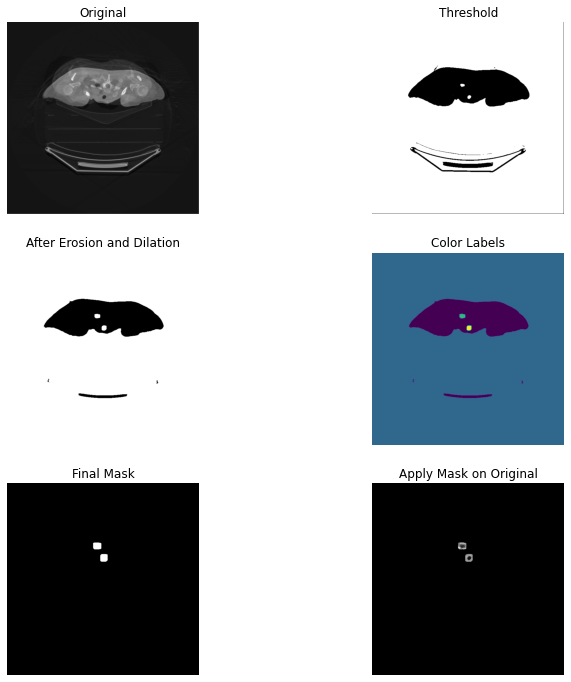

array([[-0., -0., -0., ..., -0., -0.,  0.],
       [-0., -0., -0., ..., -0., -0.,  0.],
       [-0., -0., -0., ..., -0., -0.,  0.],
       ...,
       [-0., -0., -0., ..., -0., -0.,  0.],
       [-0., -0., -0., ..., -0., -0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [56]:
img = imgs_after_resamp[100]
make_ct_mask(img, display=True)

In [57]:
masked_ct = []

for img in imgs_after_resamp:
    masked_ct.append(make_ct_mask(img))

#sample_stack(masked_ct, show_every=10)

NameError: ignored

In [58]:
masked_ct

[array([[-0., -0., -0., ..., -0., -0.,  0.],
        [-0., -0., -0., ..., -0., -0.,  0.],
        [-0., -0., -0., ..., -0., -0.,  0.],
        ...,
        [-0., -0., -0., ..., -0., -0.,  0.],
        [-0., -0., -0., ..., -0., -0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[-0., -0., -0., ..., -0., -0.,  0.],
        [-0., -0., -0., ..., -0., -0.,  0.],
        [-0., -0., -0., ..., -0., -0.,  0.],
        ...,
        [-0., -0., -0., ..., -0., -0.,  0.],
        [-0., -0., -0., ..., -0., -0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[-0., -0., -0., ..., -0., -0.,  0.],
        [-0., -0., -0., ..., -0., -0.,  0.],
        [-0., -0., -0., ..., -0., -0.,  0.],
        ...,
        [-0., -0., -0., ..., -0., -0.,  0.],
        [-0., -0., -0., ..., -0., -0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[-0., -0., -0., ..., -0., -0.,  0.],
        [-0., -0., -0., ..., -0., -0.,  0.],
        [-0., -0., -0., ..., -0., -0.,  0.],
        ..

In [59]:
len(masked_ct)

620

In [ ]:
X_train = imgs_after_resamp
Y_train = y_train

In [60]:
def plot_3d(image, threshold=-300): 
    p = image.transpose(2,1,0)
    verts, faces, normals, values = measure.marching_cubes_lewiner(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    plt.show()

In [5]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(700,700,1,)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.2))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='sigmoid')) 
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 698, 698, 64)      640       
_________________________________________________________________
activation_1 (Activation)    (None, 698, 698, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 349, 349, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 347, 347, 32)      18464     
_________________________________________________________________
activation_2 (Activation)    (None, 347, 347, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 173, 173, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 957728)           

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(X_train,Y_train,epochs=20,callbacks=[checkpoint],validation_split=0.2) 

In [ ]:
model_new = keras.models.load_model("final_model.h5")